In [ ]:
%cd /content/drive/MyDrive/LAB__XIA/LAB_XIA

/content/drive/MyDrive/LAB__XIA/LAB_XIA


# **BLACK BOX MODEL CREATE**

In [ ]:
!pip install kaggle
!wget -O kaggle.json https://www.dropbox.com/scl/fi/7cmh7oq8tl92eoqmbdltz/kaggle.json?rlkey=4e5tq5o593oydzwjy7vy4ssyv&dl=0
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d diegobabativa/depression
!unzip /content/depression.zip
!rm /content/depression.zip

In [ ]:
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = prepare_dataframe(df, class_field)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import pandas as pd
df = pd.read_csv('/content/b_depressed.csv')

df = df.drop(['Survey_id'], axis=1)

df = df.fillna(method='ffill').dropna()

normalized_df = (df - df.min()) / (df.max() - df.min())

# Suponiendo que 'df' es el DataFrame con los datos a procesar
# y 'target' es el nombre de la columna objetivo

# Identificar columnas categóricas y numéricas
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('target')  # Asumimos que 'target' no debe ser normalizado

# Crear transformadores para las columnas numéricas y categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Tratar valores faltantes
    ('scaler', MinMaxScaler())  # Escalar las características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Tratar valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode las características categóricas
])

# Combinar transformadores en un preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Crear un pipeline que procese los datos y luego aplique un modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])



In [ ]:
import pandas as pd

# Asumiendo que df es tu DataFrame y 'column_name' es la columna donde quieres buscar duplicados
duplicados = df[df['Ville_id'].duplicated()]['Ville_id']

print("Valores duplicados en la columna:", duplicados.unique())


Valores duplicados en la columna: [102  25  92  57  23  50  22  21  15  30  52  27 207  89 114 115   1  42
  18  54  60 101   8  63  20   5   9  33  32  19 198 129  11  72  94 125
 181 168  17 138  14  24  44  81  28  49  80   2  85 173 116  46  53 100
  66  37  10  61  26   3  64 144  70  13  16  75  95  39  90  69  43  35
  56  67   6  78 267 134  91 108   7  79  55  12 195   4  83 112  76  31
 127 104 106  88 242  74  41  73  77 120  59 179 167 201  65  87 171  29
  38  97 210 159 220 150 206  51  48  47  68 202 164  71 111 105  82 137
 169 266 131 236  34 142 193 136  45  36 233 187 132  98 109 192 184 154
 146 161 153 258 126 143  40 124 103 121  99 214 149 209 176 130 249 160
 107  62 254 211 135 174 234 180  86 133 117 162 188 156 262 158 113  96
 256 218 119  84  93 228 166 250  58 241 217 186 251 200 148 152 185 222]


In [ ]:
duplicados = df.loc[df['Survey_id'].duplicated(), 'Survey_id']

print("Valores duplicados en la columna:", duplicados.unique())

Valores duplicados en la columna: []


In [ ]:
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [ ]:
data = data.drop(['Survey_id','Ville_id'], axis=1)

In [ ]:
 Seleccionar columnas relevantes y descartar filas con valores nulos en columnas clave

data
data_clean = data.dropna(subset=['suicides_no', 'population', 'gdp_per_capita ($)'])

# Definir las columnas categóricas y numéricas para el preprocesamiento
categorical_features = ['country', 'year', 'sex', 'age', 'generation']
numerical_features = ['population', 'gdp_per_capita ($)']

# Crear transformadores para las columnas numéricas y categóricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combinar transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Separar características y objetivo
X = data_clean.drop(['suicides_no', 'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($) '], axis=1)
y = data_clean['suicides_no']


In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import json
import urllib.request
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
!pip install kaggle
!pip install tab-transformer-pytorch

class Bb_Models():

  def __init__(self,tabular_model):

    #TABULAR



    #TEXT

    #IMAGES

  def get_bb_tab_model(self):
    #https://github.com/lucidrains/tab-transformer-pytorch
    #Dataset pre select
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

# Carga el conjunto de datos
data = pd.read_csv(url, names=column_names)

    self.bbmtab =


  def get_bb_img_model(self):

    self.bbmimg = models.resnet50(pretrained=True)
    self.bbmimg.eval()
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.bbmimg.to(self.device)

    self.tf_img = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])

    return self.bbmimg

  def get_batch_bb_img_model(self):
    return self.bbmimg



  def bbimg_inference(self,array_img):


    if isinstance(array_img, str):

      img = Image.open(array_img)
      img_t = self.tf_img(img)

      batch_t = torch.unsqueeze(img_t, 0)
      batch_t = batch_t.to(self.device)

      with torch.no_grad():
        outputs = self.bbmimg(batch_t)
        probs = torch.nn.functional.softmax(outputs[0], dim=0)

      url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
      class_idx = json.load(urllib.request.urlopen(url))
      # Invertir el mapeo para obtener un diccionario de índice a etiqueta
      idx2label = {int(key):value for key, value in class_idx.items()}
      top5_prob, top5_catid = torch.topk(probs, 5)

      for i in range(top5_prob.size(0)):
        idx = top5_catid[i].item()
        label = idx2label[idx][1]  # Obtener el nombre de la clase
        print(f"{i+1}: {label}, Probabilidad: {top5_prob[i].item():.6f}")

      return batch_t

    else:

      imgs = []
      for img_arr in array_img:
          # Convertir el array de NumPy a PIL.Image
          img = Image.fromarray(img_arr.astype('uint8'), 'RGB')
          # Aplicar transformaciones
          img_transformed = self.tf_img(img)
          imgs.append(img_transformed)

      #batch = torch.stack(tuple(self.tf_img(i) for i in array_img), dim=0)
      batch = torch.stack(imgs, dim=0)
      batch = batch.to(self.device)
      with torch.no_grad():

        outputs = self.bbmimg(batch)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        return probs.cpu().numpy()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 39)

In [ ]:
blackbox_model = Bb_Models()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 38.7MB/s]


In [ ]:
blackbox_model.bbimg_inference('/content/leo.jpg')

1: lion, Probabilidad: 0.999694
2: cheetah, Probabilidad: 0.000143
3: leopard, Probabilidad: 0.000056
4: tiger, Probabilidad: 0.000025
5: collie, Probabilidad: 0.000006


tensor([[[[-0.3712, -0.8849, -1.2788,  ...,  1.3413,  1.2728,  1.2728],
          [-0.3369, -0.9192, -1.2103,  ...,  1.4954,  1.4440,  1.3927],
          [-0.7993, -1.2617, -1.3130,  ...,  1.6495,  1.6153,  1.5125],
          ...,
          [-0.5596, -0.3369, -0.1657,  ...,  0.3652,  0.3994,  0.5364],
          [-0.4397, -0.3369, -0.0801,  ...,  0.3138,  0.2111,  0.3138],
          [-0.3198, -0.1828, -0.0801,  ...,  0.3994,  0.3481,  0.3652]],

         [[-0.4426, -0.9678, -1.3704,  ...,  1.1506,  1.0805,  1.0805],
          [-0.4076, -1.0028, -1.3004,  ...,  1.3081,  1.2556,  1.2031],
          [-0.8627, -1.3354, -1.3880,  ...,  1.4482,  1.4132,  1.3256],
          ...,
          [-0.7752, -0.5476, -0.4076,  ...,  0.2227,  0.2577,  0.3978],
          [-0.6527, -0.5476, -0.2850,  ...,  0.1702,  0.0651,  0.1702],
          [-0.5126, -0.3901, -0.2850,  ...,  0.2577,  0.2052,  0.2227]],

         [[-0.2881, -0.8110, -1.2119,  ...,  0.9145,  0.8622,  0.8622],
          [-0.2707, -0.8807, -

# **LOREsa**

Basados en https://github.com/francescanaretto/LORE_sa

In [1]:
!pip install kaggle # Instalar kaggle
!wget -O kaggle.json https://www.dropbox.com/scl/fi/2o48co66yblzdyyxpop4m/kaggle.json?rlkey=4h8fmstfcccbzi6prtpugq6kj&dl=0 # Descargar archivo .json con clave

--2024-03-03 22:18:46--  https://www.dropbox.com/scl/fi/2o48co66yblzdyyxpop4m/kaggle.json?rlkey=4h8fmstfcccbzi6prtpugq6kj
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba4502142e42b03355eb4c0e65.dl.dropboxusercontent.com/cd/0/inline/CObosHcFV_dibnVWXixdAc2v8EmoMUekXbOzXLj860EvWv0aFPdl1cI32IGsJcgqMelf-UpZd11ey12xnt-cnDBoemkLdxbPTcw_LRh_gb8el5fmYKg4BpEM97slkpAotzOaJLU9qP3nS6-kBWHmaPPG/file# [following]
--2024-03-03 22:18:47--  https://ucba4502142e42b03355eb4c0e65.dl.dropboxusercontent.com/cd/0/inline/CObosHcFV_dibnVWXixdAc2v8EmoMUekXbOzXLj860EvWv0aFPdl1cI32IGsJcgqMelf-UpZd11ey12xnt-cnDBoemkLdxbPTcw_LRh_gb8el5fmYKg4BpEM97slkpAotzOaJLU9qP3nS6-kBWHmaPPG/file
Resolving ucba4502142e42b03355eb4c0e65.dl.dropboxusercontent.com (ucba4502142e42b03355eb4c0e65.dl.dropboxusercontent.com)... 162.125.5.15, 2620:10

In [2]:
!mkdir -p ~/.kaggle # Crea una carpeta llamada kaggle en raiz
!cp kaggle.json ~/.kaggle/ # Copia el archivo json en la carpeta creada

In [3]:
!chmod 600 ~/.kaggle/kaggle.json # Dar permisos a kaggle

In [4]:
!kaggle datasets download -d joebeachcapital/differentiated-thyroid-cancer-recurrence

  0% 0.00/3.03k [00:00<?, ?B/s]
100% 3.03k/3.03k [00:00<00:00, 7.12MB/s]


In [5]:
!unzip /content/differentiated-thyroid-cancer-recurrence.zip

Archive:  /content/differentiated-thyroid-cancer-recurrence.zip
  inflating: Thyroid_Diff.csv        


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/Thyroid_Diff.csv')

In [8]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [ ]:
X/50

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Splitting the dataset into features and target variable
# Assuming the 'Response' column is the target variable. If not, replace 'Response' with the correct target variable.
X = df.drop('Recurred', axis=1)
y = df['Recurred']


split_idx = int(len(X) * 0.8)

# Dividiendo el DataFrame
X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

# Ajustando los índices para que comiencen en 1
X_train.index = range(0, len(X_train) )
X_test.index = range(0, len(X_test))
y_train.index = range(0, len(y_train))
y_test.index = range(0, len(y_test))


# Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Displaying the transformed dataset and split sizes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((306, 16), (77, 16), (306,), (77,))

In [43]:
train_set = X_train
train_label = y_train
test_set = X_test
test_label = y_test

In [30]:
%cd /content/drive/MyDrive/LAB__XIA/LAB_XIA/LORE
!pip install -r ./requitements.txt
from lorem_new import LOREM
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import defaultdict

/content/drive/MyDrive/LAB__XIA/LAB_XIA/LORE


In [44]:
rf = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=10,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)
rf.fit(train_set, train_label)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=500,
                       max_features='auto', min_samples_leaf=10,
                       min_samples_split=50, random_state=0)

In [45]:

predictions1 = rf.predict(train_set)
score = rf.score(train_set, train_label)
report = classification_report(train_label, predictions1)
print('Classification report for train set ', report)
predictions1 = rf.predict(test_set)
score = rf.score(test_set, test_label)
report = classification_report(test_label, predictions1)
print('Classification report for test set ', report)

Classification report for train set                precision    recall  f1-score   support

           0       1.00      0.90      0.95       272
           1       0.56      0.97      0.71        34

    accuracy                           0.91       306
   macro avg       0.78      0.94      0.83       306
weighted avg       0.95      0.91      0.92       306

Classification report for test set                precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.99      0.96      0.97        74

    accuracy                           0.95        77
   macro avg       0.69      0.81      0.74        77
weighted avg       0.96      0.95      0.95        77



In [46]:
neigh_type = 'cfs' # the generation you want (random, genetic, geneticp, cfs, rndgen)
binary = 'binary_from_dts' #how to merge the trees (binary from dts, binary from bb are creating a binary tree, nari is creating a n ari tree)
cxpb = 0.7 # values to set for the genetic generation
mutpb = 0.5 #values to set for the genetic generation
ngen = 2 # number of neighborhood generations to do
runs = 2 #how many neighbours and trees to create and then merge
class_name = 'Recurred' #name of the column used as target
class_values = [0,1] #values that the target may have

feature_names = test_set.columns
real_feature_names = test_set.columns
numeric_columns = list()
for c in test_set.columns:
    numeric_columns.append(test_set.columns.get_loc(c))

features_map = defaultdict(dict)
i = 0
j = 0

while i < len(feature_names) and j < len(real_feature_names):
    if feature_names[i] == real_feature_names[j]:
        features_map[j][feature_names[i].replace('%s=' % real_feature_names[j], '')] = i
        i += 1
        j += 1
    elif feature_names[i].startswith(real_feature_names[j]):
        features_map[j][feature_names[i].replace('%s=' % real_feature_names[j], '')] = i
        i += 1
    else:
        j += 1

In [47]:
neigh_kwargs = {
        "balance": False,
        "sampling_kind": "gaussian",
        "kind": "gaussian_global",
        "downward_only": True,
        "redo_search": True,
        "forced_balance_ratio": 0.5,
        "cut_radius": True,
        "n": 50,
        "normalize": 'minmax',
        "forced_balance_ratio": 0.5,
        "n_batch": 5,
        "datas": train_set.values
    }

In [48]:
# neigh type: the way in which you want to generate the neighbourhood (random, genetic, geneticp, rndgen, rndgenp, cfs)
# ocr, mutpb, cxpb: values to set for the genetic generation
# negen: number of neighborhood generations to do
# runs: how many neighbours and trees to create and then merge
# discretize: in the surrogate trees, discretize variables to better generalize and have a smaller tree
# binary: how to merge the trees (binary from dts, binary from bb are creating a binary tree, nari is creating a n ari tree)
# encdec: if you want to generate the neighbours in an encoded space (for now you can select onw hot and target encoding)
# dataset: in case you selected an encdec, this dataset is used to fit the encoder
# K_transformed: a piece of dataset in the form you can feed to the BB
# extreme fidelity: if True, it checks that the prediction of the surrogate model is the same as the BB
# filter c rules: it filters the counterfactual rules by checking if they are true conterfactuals or not
explainer = LOREM(train_set.values, rf.predict, rf.predict_proba, feature_names, class_name, class_values, numeric_columns, features_map,
                      neigh_type=neigh_type, categorical_use_prob=True, continuous_fun_estimation=True, size=1000,
                      ocr=0.1, multi_label=False, one_vs_rest=False, random_state=42, verbose=True,
                      Kc=train_set, bb_predict_proba=rf.predict_proba, K_transformed=train_set, discretize=True,
                      encdec=None, binary=binary, **neigh_kwargs)

Neigh kind  cfs
sampling kind  gaussian_global


# **aqui**

In [58]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   77 non-null     int64
 1   Gender                77 non-null     int64
 2   Smoking               77 non-null     int64
 3   Hx Smoking            77 non-null     int64
 4   Hx Radiothreapy       77 non-null     int64
 5   Thyroid Function      77 non-null     int64
 6   Physical Examination  77 non-null     int64
 7   Adenopathy            77 non-null     int64
 8   Pathology             77 non-null     int64
 9   Focality              77 non-null     int64
 10  Risk                  77 non-null     int64
 11  T                     77 non-null     int64
 12  N                     77 non-null     int64
 13  M                     77 non-null     int64
 14  Stage                 77 non-null     int64
 15  Response              77 non-null     int64
dtypes: int64(1

In [51]:
# x the instance to explain
# samples the number of samples to generate during the neighbourhood generation
# use weights True or False
# metric default is neuclidean, it is the metric employed to measure the distance between records
# runs number of times the neighbourhood generation is done
# exemplar_num number of examplars to retrieve
# kwargs a dictionary in which add the parameters needed for cfs generation
# kernel and kernel width are for the definition of weights. deafult is None, it automatically select them.

explanation = explainer.explain_instance_stable(test_set.loc[0].values.reshape(1,-1), 150, runs=runs, n_jobs=2)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


binary sampling search binary sampling search  50 5 
50 5
lower_threshold: lower_threshold:  0
upper_threshold:  2.0
 0
upper_threshold:  2.0
lower_threshold: lower_threshold:  0
upper_threshold:  1.0
 0
upper_threshold:  1.0
lower_threshold:  0
upper_threshold:  0.5
lower_threshold:  0
upper_threshold:  0.5
lower_threshold: lower_threshold:  0
upper_threshold:  0.25
 0
upper_threshold:  0.25
lower_threshold:  0
upper_threshold:  0.125
lower_threshold:  0
upper_threshold:  0.125
lower_threshold:  0
upper_threshold:  0.0625
lower_threshold:  0
upper_threshold:  0.0625
lower_threshold:  0
upper_threshold:  0.03125
lower_threshold:  0
upper_threshold:  0.03125
lower_threshold:  0
upper_threshold:  0.015625
lower_threshold:  0
upper_threshold:  0.015625
lower_threshold:  0
upper_threshold:  0.0078125
lower_threshold: lower_threshold:   0
upper_threshold:  0.00390625
0
upper_threshold:  0.00390625
lower_threshold:  0
upper_threshold:  0.001953125
lower_threshold:  0
upper_threshold:  0.0019

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   24.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


Synthetic neighborhood class counts {0: 25, 1: 25}
Synthetic neighborhood class counts {0: 20, 1: 20}
Learning local decision trees
la self k  [[27  0  0 ...  0  0  2]
 [34  0  0 ...  0  0  1]
 [30  0  0 ...  0  0  1]
 ...
 [73  0  0 ...  0  1  3]
 [26  0  0 ...  1  0  3]
 [30  0  0 ...  0  0  3]]
exemplars  [[27  0  0 ...  0  0  2]
 [34  0  0 ...  0  0  1]
 [30  0  0 ...  0  0  1]
 ...
 [73  0  0 ...  0  1  3]
 [26  0  0 ...  1  0  3]
 [30  0  0 ...  0  0  3]] []
CASO DI EX E NONE
entro con exemplars  [[37  0  0 ...  0  0  1]
 [36  0  0 ...  0  0  1]
 [35  0  0 ...  0  0  1]
 ...
 [75  1  1 ...  1  4  3]
 [76  0  0 ...  0  0  1]
 [81  0  0 ...  0  1  1]] ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']


In [52]:
print(explanation.rule)
for c in explanation.crules:
    print(c)

{ Response <= 3.02, Risk <= 7.74, Gender > -8.99, Smoking <= 3.26, N <= 22.32 } --> { Recurred: 1 }
{ Response <= 3.02, Risk <= 7.74, Gender > -8.99, Smoking <= 3.26, N <= 22.32 } --> { Recurred: 1 }


In [57]:
explanation.exemplars

'{ Age = 37Thyroid Function = 2Physical Examination = 4Adenopathy = 3Pathology = 3Risk = 2T = 3Response = }\n{ Age = 36Thyroid Function = 2Physical Examination = 4Adenopathy = 3Pathology = 3Focality = 1Risk = 2T = 2Response = }\n{ Age = 35Thyroid Function = 2Physical Examination = 4Adenopathy = 3Pathology = 3Focality = 1Risk = 2T = 2Response = }\n{ Age = 37Thyroid Function = 2Physical Examination = 4Adenopathy = 3Pathology = 3Focality = 1Risk = 2T = 2Response = }\n{ Age = 37Thyroid Function = 2Physical Examination = 4Adenopathy = 3Pathology = 3Focality = 1Risk = 2T = 2Response = }\n{ Age = 35Thyroid Function = 2Physical Examination = 1Adenopathy = 3Pathology = 3Risk = 2T = 3Response = }\n{ Age = 36Thyroid Function = 2Physical Examination = 4Adenopathy = 5Pathology = 3Focality = 1Risk = 1T = 2N = 2Response = }\n{ Age = 34Thyroid Function = 2Physical Examination = 3Adenopathy = 3Pathology = 3Focality = 1Risk = 2T = 3Response = }\n{ Age = 34Thyroid Function = 2Physical Examination = 4Aden

In [54]:
explanation.feature_importance_all


{'Age': 0.038337832516676405,
 'Gender': 0.06318054823610797,
 'Smoking': 0.024282198085701007,
 'Hx Smoking': 0.03362652701839617,
 'Hx Radiothreapy': 1.0982812043926486e-15,
 'Thyroid Function': 0.0,
 'Physical Examination': 0.0,
 'Adenopathy': 0.05117101104069253,
 'Pathology': 0.0,
 'Focality': 0.0,
 'Risk': 0.28633667928539364,
 'T': 0.0,
 'N': 0.05232434246007056,
 'M': 0.0,
 'Stage': 0.0,
 'Response': 0.45074086135696073}

In [55]:
explanation.feature_importance


{'Gender': 0.06318054823610797,
 'Smoking': 0.024282198085701007,
 'Risk': 0.28633667928539364,
 'N': 0.05232434246007056,
 'Response': 0.45074086135696073}

# **LIME**

In [ ]:
!pip install lime

  0%|          | 0/1000 [00:00<?, ?it/s]

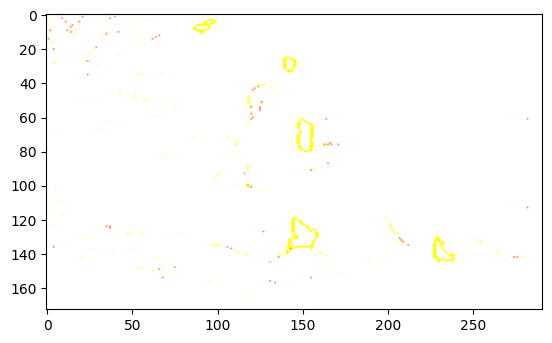

In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

explainer = lime_image.LimeImageExplainer()
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

image = Image.open("/content/leo.jpg")
image = image.convert('RGB')  # Asegúrate de que la imagen está en RGB

explanation = explainer.explain_instance(np.array(image),
                                         blackbox_model.bbimg_inference,  # función de clasificación definida anteriormente
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000,  # puedes ajustar este número
                                         segmentation_fn=segmenter)

# Visualizar la explicación para la clase específica
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], num_features=2, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

# **OTHERS**

In [ ]:
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00


In [ ]:
!ls

drive  leo.jpg	sample_data


In [ ]:
!git clone https://github.com/Hryniewska/EnsembleXAI.git

Cloning into 'EnsembleXAI'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 117 (delta 9), reused 57 (delta 8), pack-reused 57
Receiving objects: 100% (117/117), 56.77 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Updating files: 100% (110/110), done.


In [ ]:
%cd /content/EnsembleXAI

/content/EnsembleXAI


In [ ]:
!ls

docs	     LICENSE  notebooks       README.md		setup.py
EnsembleXAI  models   pyproject.toml  requirements.txt


In [ ]:
import torch
from EnsembleXAI.Ensemble import normEnsembleXAI
from captum.attr import IntegratedGradients, GradientShap, Saliency

In [ ]:
from captum.attr import

In [ ]:
# Cargar y preparar una imagen
img = Image.open("/content/leo.jpg")
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

NameError: name 'transform' is not defined

In [ ]:
net = blackbox_model.get_bb_img_model()
inputs = blackbox_model.bbimg_inference('/content/leo.jpg')

1: lion, Probabilidad: 0.999694
2: cheetah, Probabilidad: 0.000143
3: leopard, Probabilidad: 0.000056
4: tiger, Probabilidad: 0.000025
5: collie, Probabilidad: 0.000006


In [ ]:
ig = IntegratedGradients(net).attribute(inputs, target=3)
baselines = torch.randn_like(inputs)
gs = GradientShap(net).attribute(inputs,baselines = baselines, target=3)
sal = Saliency(net).attribute(inputs, target=3)


explanations = torch.stack([ig, gs, sal], dim=0)
agg = normEnsembleXAI(explanations, aggregating_func='avg')

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


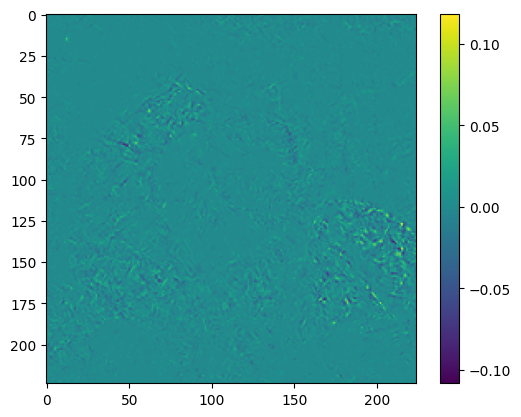

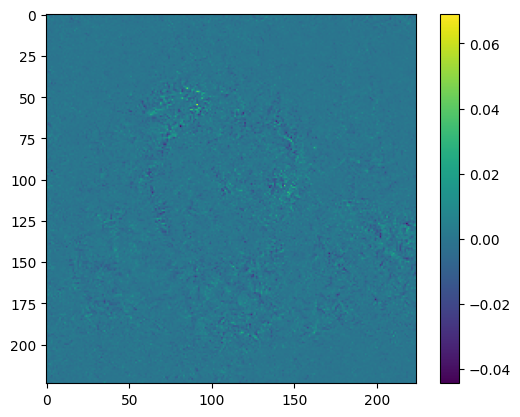

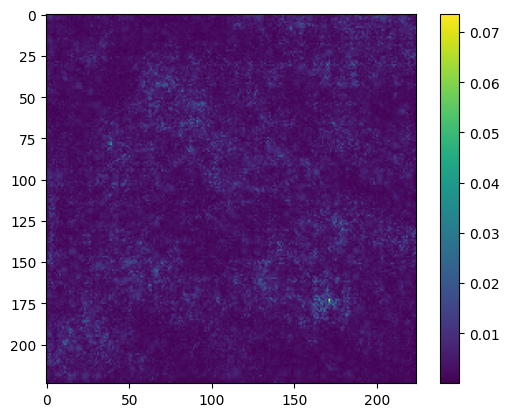

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para visualizar una atribución
def visualize_attribution(attribution):
    # Suponiendo que la atribución es [1, C, H, W], la reducimos a [H, W] para visualización
    # Esto es un ejemplo; tu lógica de reducción puede variar
    attribution = attribution.squeeze().mean(dim=0).cpu().detach().numpy()

    plt.imshow(attribution, cmap='viridis')
    plt.colorbar()
    plt.show()

# Visualiza las atribuciones de IntegratedGradients
visualize_attribution(ig)

# Visualiza las atribuciones de GradientShap
visualize_attribution(gs)

# Visualiza las atribuciones de Saliency
visualize_attribution(sal)


In [ ]:

# Procesar las atribuciones para obtener un mapa de calor
# Seleccionamos una técnica simple aquí: tomar el valor absoluto y luego normalizar
attribution_visual = np.mean(np.abs(attribution_np), axis=0)  # Promedio sobre los canales para simplificar
attribution_visual = attribution_visual / np.max(attribution_visual)  # Normalizar

# Crear el mapa de calor superponiendo las atribuciones en la imagen original
plt.figure(figsize=(10, 5))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(input_visual)
plt.axis('off')
plt.title('Original Image')

# Mostrar el mapa de calor de las atribuciones
plt.subplot(1, 2, 2)
plt.imshow(input_visual, alpha=0.5)  # Mostrar la imagen con semi-transparencia
plt.imshow(attribution_visual, cmap='jet', alpha=0.5)  # Superponer el mapa de calor
plt.axis('off')
plt.title('Guided GradCAM')

plt.show()

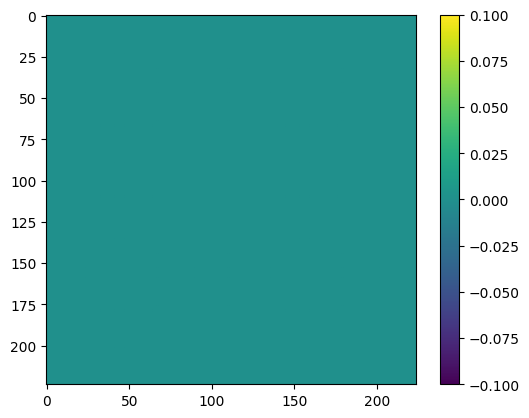

In [ ]:
visualize_attribution(attribution)

In [ ]:
from torchvision import models
import torch
from captum.attr import GuidedGradCam

layer_to_visualize = net.layer4[-1]

# Crear una instancia de GuidedGradCam con tu modelo y la capa seleccionada
guided_gc = GuidedGradCam(net, layer_to_visualize)

attribution = guided_gc.attribute(inputs, target=3)


/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/captum/attr/_core/guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


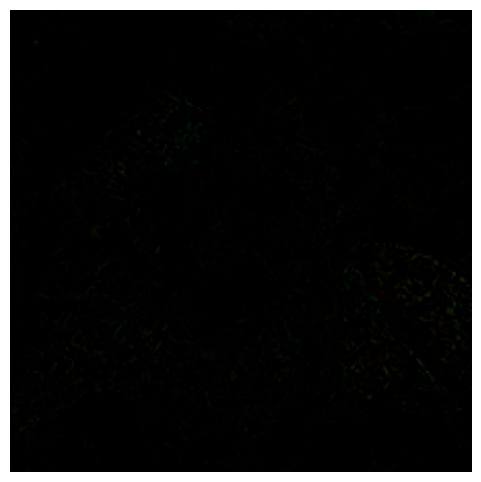

In [ ]:
image_tensor = explanations[0, 0, :, :, :]

# Move the tensor to CPU and convert to a format plottable by matplotlib (move channels to last dimension)
image_to_plot = image_tensor.permute(1, 2, 0).cpu().numpy()

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(image_to_plot)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()